In [8]:
from google.colab import files
uploaded = files.upload()  # Upload your CSV file

Saving kaggle_ecommerce_complete_Rank_Crowd_AGG_Descriptions_ALL_ROWS.csv to kaggle_ecommerce_complete_Rank_Crowd_AGG_Descriptions_ALL_ROWS (1).csv


In [1]:
import pandas as pd

# Retry loading the dataset with a different encoding
data = pd.read_csv("data.csv", encoding='latin1')

# Displaying the first few rows and column details again
data_info = {
    "Column Names": data.columns.tolist(),
    "Sample Rows": data.head(),
    "Dataset Info": data.info()
}

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32671 entries, 0 to 32670
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             32671 non-null  int64  
 1   relevance            20571 non-null  float64
 2   relevance:variance   20571 non-null  float64
 3   product_image        32671 non-null  object 
 4   product_link         32671 non-null  object 
 5   product_price        32671 non-null  object 
 6   product_title        32671 non-null  object 
 7   query                32671 non-null  object 
 8   rank                 32671 non-null  int64  
 9   source               32671 non-null  object 
 10  url                  32671 non-null  object 
 11  product_description  24800 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.0+ MB


{'Column Names': ['_unit_id',
  'relevance',
  'relevance:variance',
  'product_image',
  'product_link',
  'product_price',
  'product_title',
  'query',
  'rank',
  'source',
  'url',
  'product_description'],
 'Sample Rows':     _unit_id  relevance  relevance:variance  \
 0  711158459       3.67               0.471   
 1  711158460       4.00               0.000   
 2  711158461       4.00               0.000   
 3  711158462       3.67               0.471   
 4  711158463       3.33               0.471   
 
                                        product_image  \
 0  http://thumbs2.ebaystatic.com/d/l225/m/mzvzEUI...   
 1  http://thumbs3.ebaystatic.com/d/l225/m/mJNDmSy...   
 2  http://thumbs4.ebaystatic.com/d/l225/m/m10NZXA...   
 3  http://thumbs2.ebaystatic.com/d/l225/m/mZZXTmA...   
 4  http://thumbs3.ebaystatic.com/d/l225/m/mzvzEUI...   
 
                                         product_link  \
 0  http://www.ebay.com/itm/Sony-PlayStation-4-PS4...   
 1  http://www.ebay.com/i

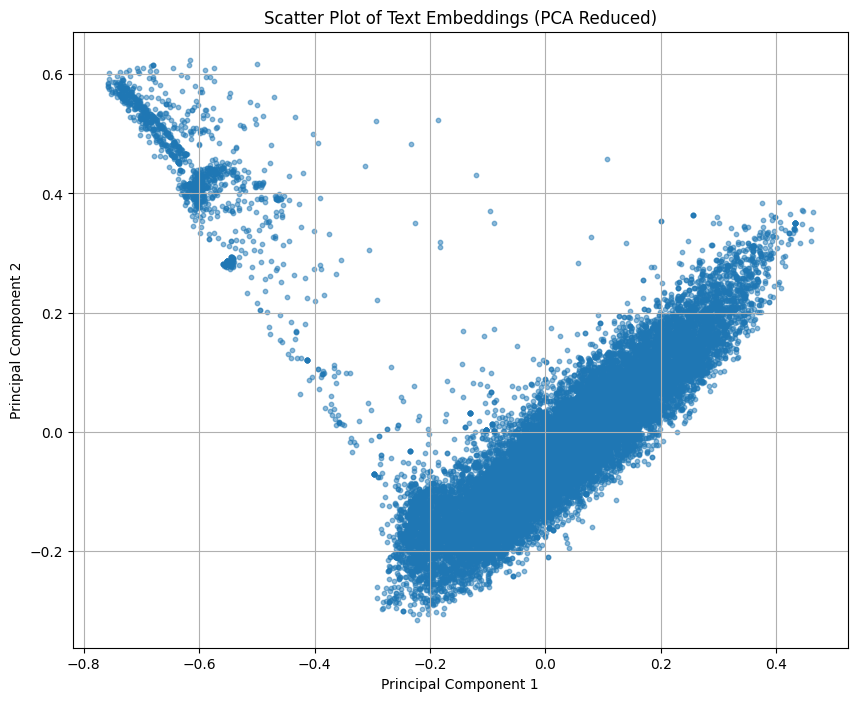

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Use the 'product_description' column for embeddings
text_data = data['product_description'].dropna()

# Generate TF-IDF embeddings
vectorizer = TfidfVectorizer(max_features=300)  # Limit to 300 features for simplicity
tfidf_embeddings = vectorizer.fit_transform(text_data).toarray()

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(tfidf_embeddings)

# Scatter plot for the reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5, s=10)
plt.title("Scatter Plot of Text Embeddings (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


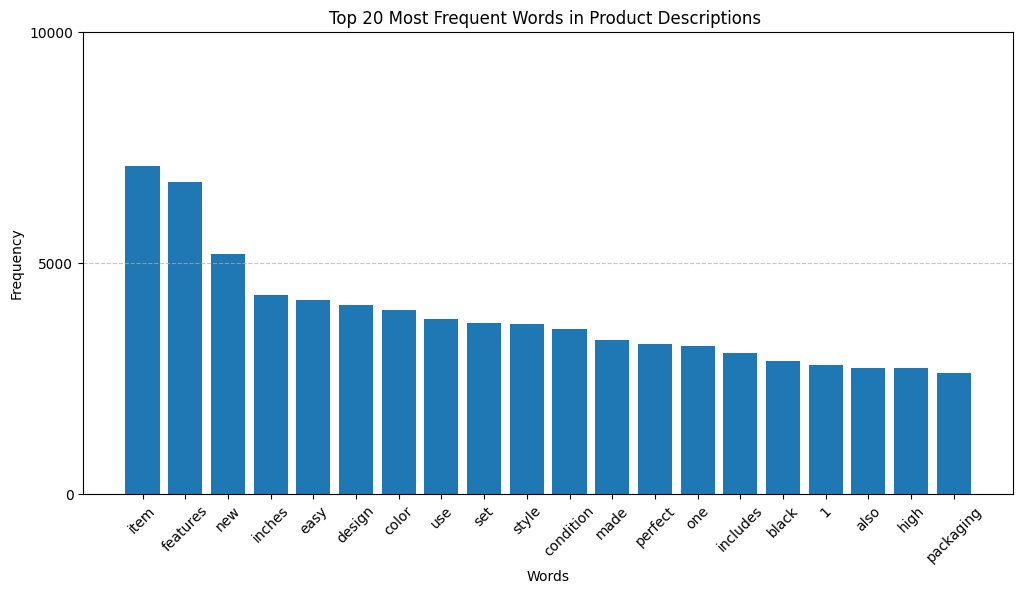

In [16]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
# Load dataset

data = pd.read_csv("data.csv", encoding='latin1')

# Extract and clean the 'product_description' column
text_data = data['product_description'].dropna().astype(str)

# Define stop words and punctuations
default_stopwords = set(stopwords.words('english'))
additional_stopwords = {"td", "tr", "li", "ul", "x", "/", "strong", "nbsp", "br", "p", "table", "s"}
stop_words = default_stopwords.union(additional_stopwords)
punctuations = set(string.punctuation)

# Function to clean text: remove HTML-like tags, punctuations, and stopwords
def clean_text(text):
    # Remove HTML tags and special characters
    text = re.sub(r"<[^>]+>", " ", text)  # Remove HTML tags
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with one
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = text.lower()  # Lowercase all words
    # Tokenize and remove stopwords
    tokens = nltk.word_tokenize(text)
    clean_tokens = [word for word in tokens if word not in stop_words]
    return clean_tokens

# Clean and tokenize all descriptions
clean_tokens = []
for description in text_data:
    clean_tokens.extend(clean_text(description))

# Count word frequencies
word_counts = Counter(clean_tokens)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

# Create a bar chart for the most common words
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title("Top 20 Most Frequent Words in Product Descriptions ")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(counts) + 5000, 5000))  # Set y-axis scale to intervals of 5,000
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


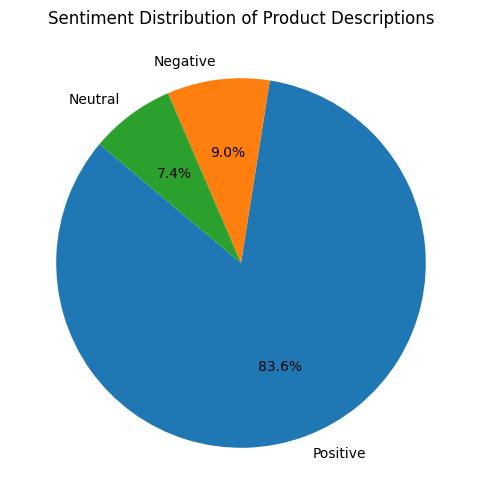

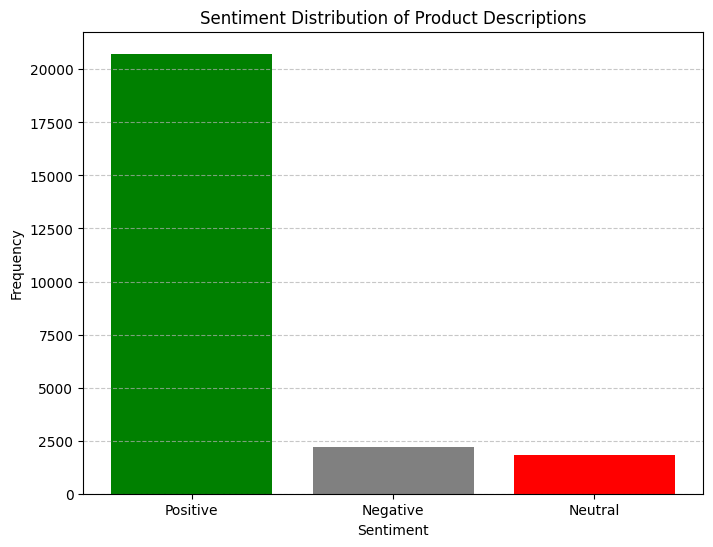

In [18]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt


# Extract and clean the 'product_description' column
text_data = data['product_description'].dropna().astype(str)

# Function to classify sentiment into Positive, Negative, or Neutral
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to each description
sentiments = text_data.apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = sentiments.value_counts()

# Pie Chart for Sentiment Distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution of Product Descriptions")
plt.show()

# Histogram for Sentiment Distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution of Product Descriptions")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Topic 1: opens, window, translation, ebay, nbsp, listing, packaging, new, condition, item
Topic 2: usb, battery, cup, design, easy, power, use, case, features, coffee
Topic 3: look, comfort, perfect, design, dress, fit, set, features, style, inches
Topic 4: time, new, cooking, wireless, skin, foam, easy, features, use, set
Topic 5: widthpx, galaxy, margin, samsung, rack, solid, color, height, width, px


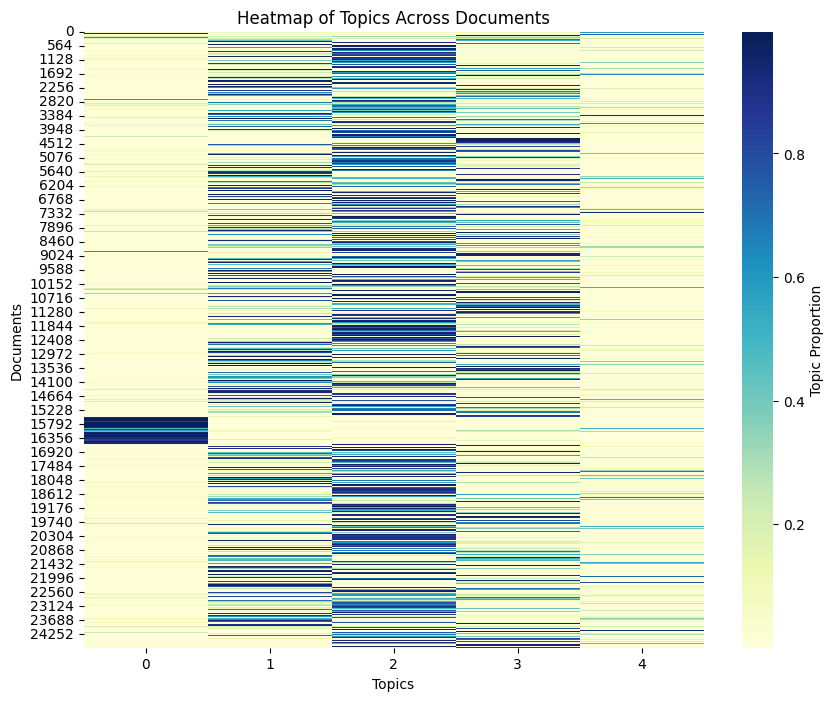

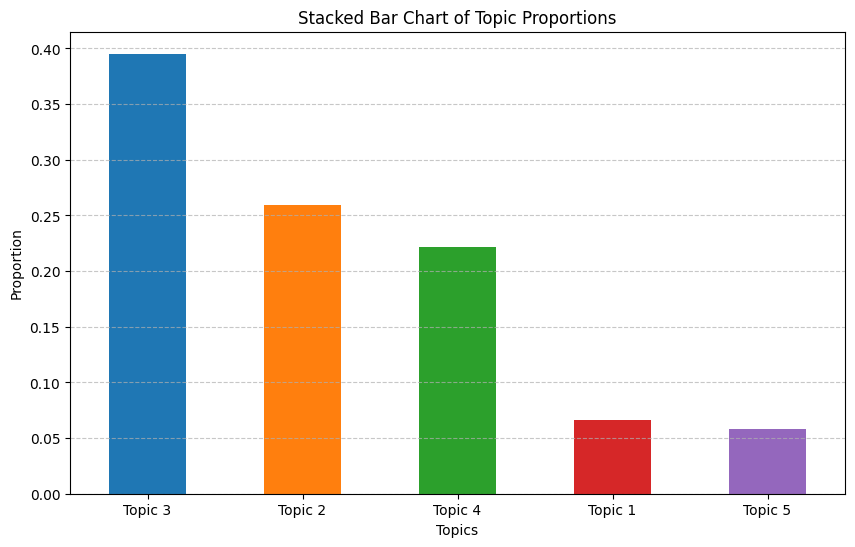

In [20]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess text
def preprocess(text):
    text = re.sub(r"<[^>]+>", " ", text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower()  # Lowercase text
    return text

# Clean the text data
cleaned_texts = text_data.apply(preprocess)

# Convert text data into a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(cleaned_texts)

# Perform LDA Topic Modeling
n_topics = 5  # Number of topics
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_matrix = lda_model.fit_transform(dtm)

# Get topic-word distribution
topic_words = lda_model.components_

# Display top words for each topic
vocab = vectorizer.get_feature_names_out()
topic_word_summary = {}
for topic_idx, topic in enumerate(topic_words):
    top_words = [vocab[i] for i in topic.argsort()[-10:]]  # Top 10 words per topic
    topic_word_summary[f"Topic {topic_idx + 1}"] = top_words

# Print top words per topic
for topic, words in topic_word_summary.items():
    print(f"{topic}: {', '.join(words)}")

# Heatmap of topics per document
plt.figure(figsize=(10, 8))
sns.heatmap(lda_matrix, cmap="YlGnBu", cbar_kws={'label': 'Topic Proportion'})
plt.title("Heatmap of Topics Across Documents")
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.show()

# Stacked Bar Chart of Topic Proportions
topic_proportions = pd.DataFrame(lda_matrix, columns=[f"Topic {i+1}" for i in range(n_topics)])
topic_means = topic_proportions.mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
topic_means.plot(kind="bar", stacked=True, color=sns.color_palette("tab10", n_topics))
plt.title("Stacked Bar Chart of Topic Proportions")
plt.xlabel("Topics")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


388/388 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4981 - loss: 0.7671
Epoch 2/2
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7097 - loss: 0.6450


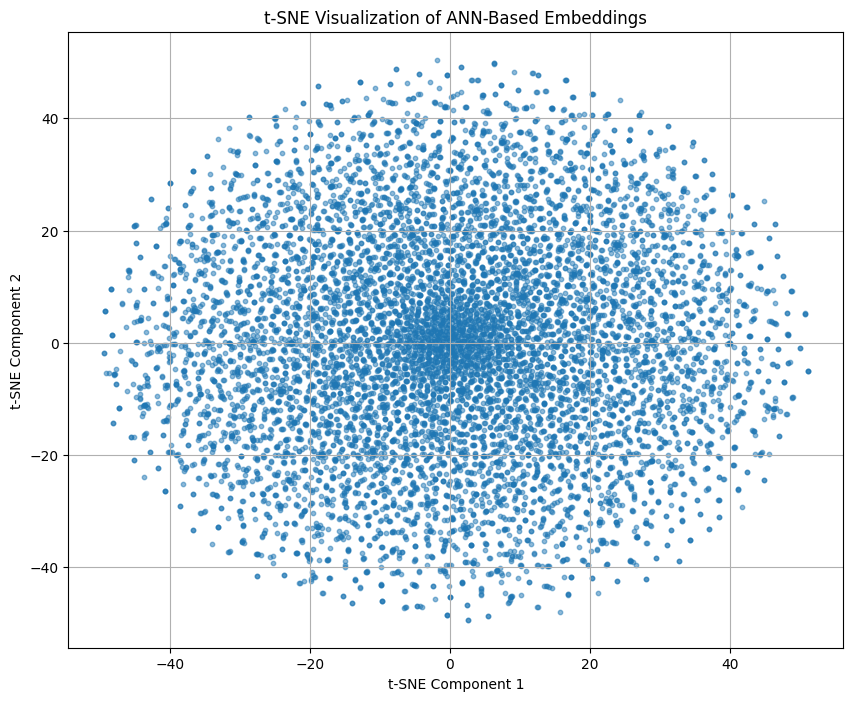

In [23]:
import pandas as pd
import re
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load dataset

data = pd.read_csv("data.csv", encoding='latin1')

# Extract and clean the 'product_description' column
text_data = data['product_description'].dropna().astype(str)

# Function to preprocess text
def preprocess(text):
    text = re.sub(r"<[^>]+>", " ", text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower()  # Lowercase text
    return text

# Clean the text data
cleaned_texts = text_data.apply(preprocess)

# Tokenize the text data
max_words = 10000  # Vocabulary size
max_len = 100  # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(cleaned_texts)
sequences = tokenizer.texts_to_sequences(cleaned_texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Dummy target variable for training
dummy_labels = np.random.randint(0, 2, size=(len(padded_sequences),))  # Binary dummy labels

# Build and train a simple ANN-based Embedding model
embedding_dim = 50  # Size of the word embedding vector
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, name="embedding_layer"),
    Flatten(),
    Dense(1, activation='sigmoid')  # Dummy output layer for training
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for a few epochs to initialize embeddings
model.fit(padded_sequences, dummy_labels, epochs=2, batch_size=64, verbose=1)

# Extract the embeddings
embedding_layer = model.get_layer("embedding_layer")
embeddings = embedding_layer.get_weights()[0]  # Word embeddings

# Reduce the dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5, s=10)
plt.title("t-SNE Visualization of ANN-Based Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()
